In [1]:
import matplotlib.pyplot as plt
import colorcet
import pandas
import seaborn as sns
import xarray
import numpy as np
from pyeosim.datasets import DATA_PATHS
from pyeosim.postprocess import CmosReflectance
from pyeosim.sensor import TeledyneCMOS
from pyeosim.spectral import Sentinel2VNIR, TreeView_1, SuperDove
from pyeosim.atmosphere import Test6S
from pyeosim.plot import rgb

# load and preprocess imagery
fpath = DATA_PATHS['TEST_HSI_LARGE']
im = xarray.open_dataset(fpath).Reflectance
im = im.swap_dims({'band':'wavelength'})
im_ref = im.sel(wavelength=slice(400,898)).astype(float)/10000

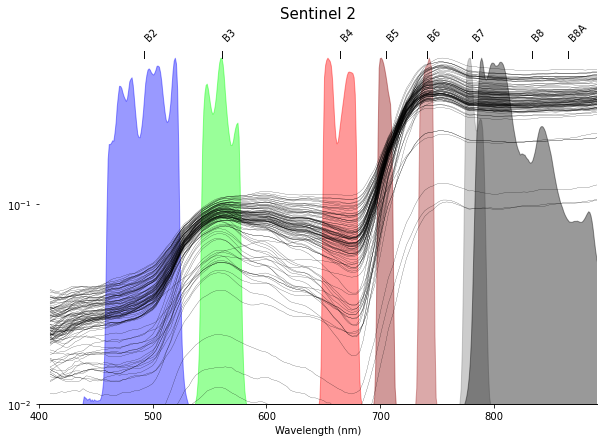

In [2]:
srf = Sentinel2VNIR()
ymax = 1
f, ax = plt.subplots(figsize=(10,7))

# Plot bands

for n, c in zip(srf.band_names,
                ['blue', 'lime', 'red', 'darkred','brown','grey', 'k']):
#     srf.srfs[n].plot(c=c, label=n,)
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,ymax*1.1)
ax.set_xlim(400,890)
# plt.legend()

ax.set_yticks([])
ax.set_ylabel('')

for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.05), rotation=45)
    ax.annotate('I', (wlen,ymax*1), rotation=0)


# Separate axis for vegetation spectra
ax2 = ax.twinx()
im_ref.isel(y=20, x=slice(250,500)).plot(hue='x', c='k', alpha=1, lw=.2, add_legend=False)
ax2.set_ylabel('')
ax2.set_yscale('log')
ax2.yaxis.tick_left()
ax2.set_ylim(.01,.8)


# remove additional ticklines
ticks = ax2.yaxis.get_minor_ticks()
[x.set_visible(False) for x in ticks]

# Titles
ax.set_xlabel('Wavelength (nm)')
plt.title('')
plt.title('Sentinel 2', size=15, loc='center',pad=5)
sns.despine(left=True)
plt.savefig('outputs/sensor_sentinel2.png', dpi=200)

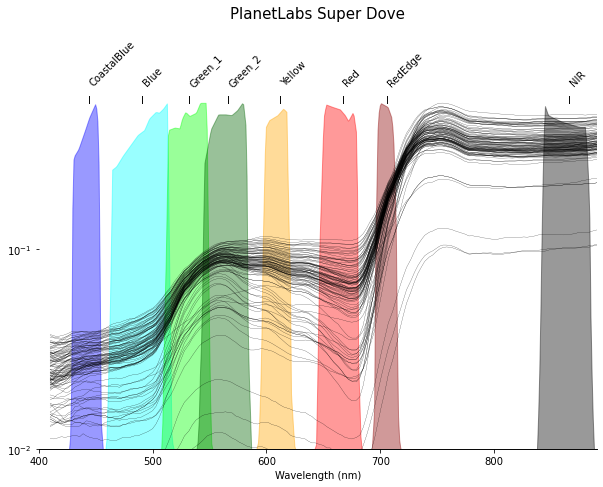

In [3]:
srf = SuperDove()
ymax = .7
f, ax = plt.subplots(figsize=(10,7))


for n, c in zip(srf.band_names,
                ['blue', 'aqua', 'lime', 'darkgreen', 'orange', 'red', 'darkred','k']):
#     srf.srfs[n].plot(c=c, label=n,)
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,ymax*1.1)
ax.set_xlim(400,890)
# plt.legend()

ax.set_yticks([])
ax.set_ylabel('')

for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.05), rotation=45)
    ax.annotate('I', (wlen,ymax*1), rotation=0)

# Separate axis for vegetation spectra
ax2 = ax.twinx()
im_ref.isel(y=20, x=slice(250,500)).plot(hue='x', c='k', alpha=1, lw=.2, add_legend=False)
ax2.set_ylabel('')
ax2.set_yscale('log')
ax2.yaxis.tick_left()
ax2.set_ylim(.01,.8)


# remove additional ticklines
ticks = ax2.yaxis.get_minor_ticks()
[x.set_visible(False) for x in ticks]

sns.despine(left=True)
ax.set_xlabel('Wavelength (nm)')
plt.title('')
plt.title('PlanetLabs Super Dove', size=15, loc='center',pad=50)
plt.savefig('outputs/sensor_superdove.png', dpi=200)

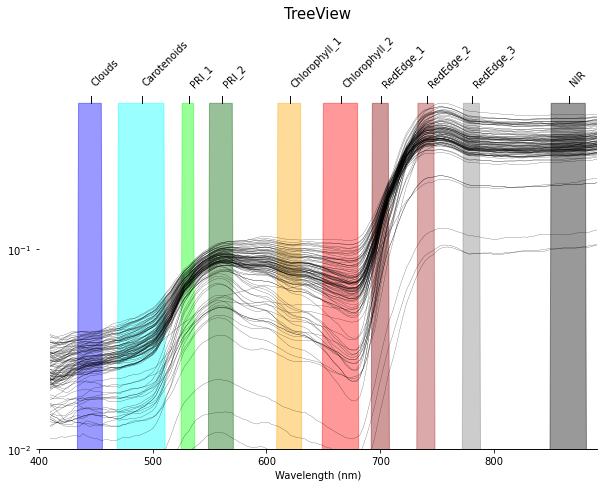

In [4]:
srf = TreeView_1()
ymax = .7
f, ax = plt.subplots(figsize=(10,7))


for n, c in zip(srf.band_names,
                ['blue', 'aqua', 'lime', 'darkgreen', 'orange', 'red', 'darkred','brown','grey', 'k']):
#     srf.srfs[n].plot(c=c, label=n,)
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,ymax*1.1)
ax.set_xlim(400,890)
# plt.legend()

ax.set_yticks([])
ax.set_ylabel('')

for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.05), rotation=45)
    ax.annotate('I', (wlen,ymax*1), rotation=0)

# Separate axis for vegetation spectra
ax2 = ax.twinx()
im_ref.isel(y=20, x=slice(250,500)).plot(hue='x', c='k', alpha=1, lw=.2, add_legend=False)
ax2.set_ylabel('')
ax2.set_yscale('log')
ax2.yaxis.tick_left()
ax2.set_ylim(.01,.8)


# remove additional ticklines
ticks = ax2.yaxis.get_minor_ticks()
[x.set_visible(False) for x in ticks]

sns.despine(left=True)
ax.set_xlabel('Wavelength (nm)')
plt.title('TreeView', size=15, loc='center',pad=50)
plt.savefig('outputs/sensor_treeview.png', dpi=200)

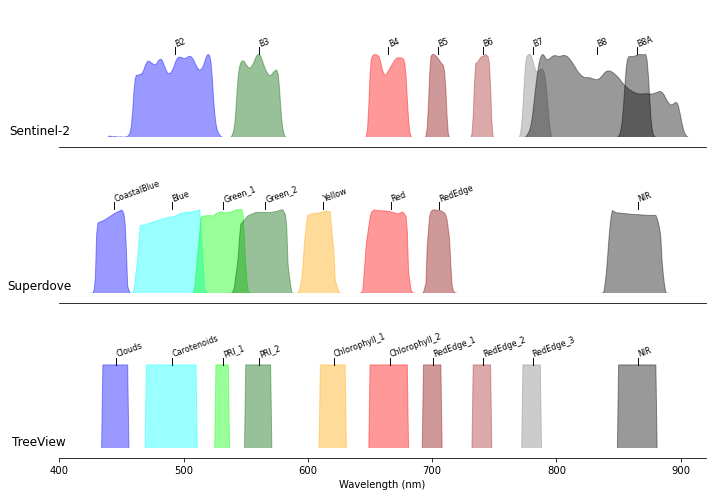

In [5]:
srf = Sentinel2VNIR()
ymax = .7
f, axs = plt.subplots(nrows=3, figsize=(10,7))

# Plot bands
###################### Sentinel
ax = axs[0]
for n, c in zip(srf.band_names,
                ['blue', 'darkgreen', 'red', 'darkred','brown','grey', 'k', 'k']):
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,1.1)
ax.set_xlim(400,920)
# plt.legend()

ax.set_yticks([])
ax.set_ylabel('')
for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.1), rotation=20, fontsize=8)
    ax.annotate('I', (wlen,ymax*1), rotation=0)
ax.set_ylabel('Sentinel-2',rotation=0, y=0, fontsize=12, labelpad=20)
ax.set_xticks([])

###################### Superdove
ax = axs[1]
srf = SuperDove()
ax.set_xticks([])
for n, c in zip(srf.band_names,
                ['blue', 'aqua', 'lime', 'darkgreen', 'orange', 'red', 'darkred','k']):
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,1.1)
ax.set_xlim(400,920)
# plt.legend()

ax.set_yticks([])
ax.set_ylabel('')

for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.1), rotation=20, fontsize=8)
    ax.annotate('I', (wlen,ymax*1), rotation=0)
ax.set_ylabel('Superdove',rotation=0, y=0, fontsize=12, labelpad=20)
ax.set_xticks([])


###################### TreeView
ax = axs[2]
srf = TreeView_1()

for n, c in zip(srf.band_names,
                ['blue', 'aqua', 'lime', 'darkgreen', 'orange', 'red', 'darkred','brown','grey', 'k']):
    ax.fill_between(x=srf.srfs[n].wavelength, y1=srf.srfs[n].values*ymax,color=c, alpha=.4)
ax.set_ylim(.01,1.1)
ax.set_xlim(400,920)

ax.set_yticks([])
ax.set_ylabel('TreeView',rotation=0, y=0, fontsize=12, labelpad=20)

for wlen, name in zip(srf.band_wavelengths.values(), srf.band_names):
    ax.annotate(name, (wlen,ymax*1.1), rotation=20, fontsize=8, color='k')
    ax.annotate('I', (wlen,ymax*1), rotation=0, color='k')

ax.set_xlabel('Wavelength (nm)')
sns.despine(left=True, offset=10)
plt.tight_layout()
plt.savefig('outputs/sensor_comparison.png', dpi=200)